In [51]:
# Import necessary packages
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [41]:
# Import data
df = pd.read_csv("parkinsons.data")
df.head(5)
df.shape

(195, 24)

In [28]:
# Get features and labels from the dataset
features = df.loc[:, df.columns != "status"].values[:,1:]
labels = df.loc[:, "status"].values

In [29]:
# Get counts of labels (1 or 0) to understand the distribution
print(len(labels[labels == 1]), len(labels[labels ==0]))

147 48


In [30]:
# Scale features between -1 and 1
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [44]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [48]:
# Create XGB Classifier Model to train the data
model = XGBClassifier(base_score = 0.5, booster = 'gbtree', colsample_bylevel = 1, colsample_bynode = 1,
                      gamma=0, learning_rate = 0.1, max_delta_step = 0, max_depth = 3,min_child_weight = 1,
                      missing = 0, n_estimators = 100, n_jobs = 1, n_thread = None, 
                      objective = 'binary:logistic', random_state = 0, reg_alpha = 0, reg_lambda = 1,
                      scale_pos_weight = 1,seed = None, silent = None, subsample = 1, verbosity = 1)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=None,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=0,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, n_thread=None, num_parallel_tree=None, ...)

Accuracy Score: 0.9230769230769231

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.90      1.00      0.95        28

    accuracy                           0.92        39
   macro avg       0.95      0.86      0.90        39
weighted avg       0.93      0.92      0.92        39



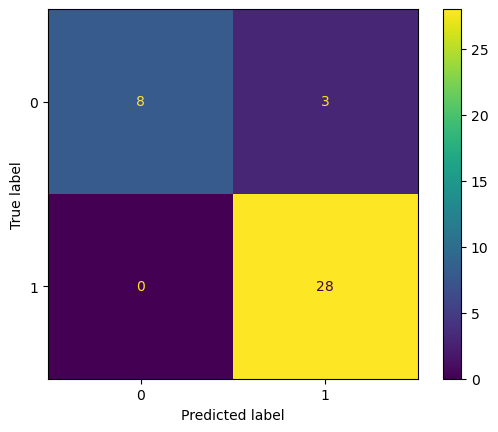

In [57]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()